In [145]:
import pandas as pd
import json
import TimeCheckNew as tc
from matplotlib import pyplot as plt
from scipy.signal import butter
from scipy.signal import lfilter

In [146]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band', analog=False)
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [163]:
temp = pd.read_csv('jeongsu/상5/1/Rawdata.txt',delimiter='\t',encoding='cp949')
t_fp_time = temp['Time']
t_fp_val = temp['EEG_Fp1']
t_fp_time
t_fp_val

0      -0.000018
1      -0.000018
2      -0.000006
3       0.000009
4      -0.000019
          ...   
7637    0.000007
7638    0.000014
7639    0.000012
7640    0.000004
7641    0.000008
Name: EEG_Fp1, Length: 7642, dtype: float64

In [178]:
t_fp_time[-1]

KeyError: -1

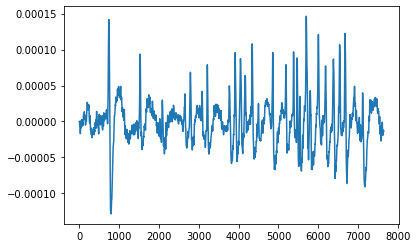

In [164]:
#Rawdata filtering
Fs = 512
lowcut = 0.5 #0.5
highcut = 30 #30
m_lpf = butter_bandpass_filter(t_fp_val,lowcut, highcut, Fs, order=5)
plt.plot(m_lpf)

In [165]:
new_csv_time = pd.DataFrame(t_fp_time)
new_csv_val = pd.DataFrame(m_lpf)
# new_csv_time
# new_csv_val

In [166]:
new_result = pd.concat([new_csv_time, new_csv_val], axis = 1)
new_result

,Time,0
0,오후 7:56:44.174,-2.049052e-09
1,오후 7:56:44.174,-2.012208e-08
2,오후 7:56:44.177,-9.608599e-08
3,오후 7:56:44.177,-3.002664e-07
4,오후 7:56:44.180,-7.004685e-07
...,...,...
7637,오후 7:57:14.145,-1.219273e-05
7638,오후 7:57:14.157,-1.251035e-05
7639,오후 7:57:14.157,-1.297280e-05
7640,오후 7:57:14.162,-1.349920e-05


In [167]:
with open('김정수/상5/timeData.json', 'r') as f:
    json_data = json.load(f)
# print(json.dumps(json_data, indent="\t") )

In [168]:
json_idx = json_data['peekIndex']
# json_idx
array_ans = []
for i in range(len(json_idx)):
    if json_idx[i] == 1:
        array_ans.append(i)

In [169]:
n_json = tc.erase_empty_json(json_data)
n_json

['2021-06-13 19:56:48.339 PM',
 '2021-06-13 19:56:48.954 PM',
 '2021-06-13 19:56:49.570 PM',
 '2021-06-13 19:56:50.202 PM',
 '2021-06-13 19:56:50.834 PM',
 '2021-06-13 19:56:51.454 PM',
 '2021-06-13 19:56:52.071 PM',
 '2021-06-13 19:56:52.719 PM',
 '2021-06-13 19:56:53.354 PM',
 '2021-06-13 19:56:53.982 PM',
 '2021-06-13 19:56:54.603 PM',
 '2021-06-13 19:56:55.236 PM',
 '2021-06-13 19:56:55.866 PM',
 '2021-06-13 19:56:56.498 PM',
 '2021-06-13 19:56:57.122 PM',
 '2021-06-13 19:56:57.754 PM',
 '2021-06-13 19:56:58.398 PM',
 '2021-06-13 19:56:59.035 PM',
 '2021-06-13 19:56:59.667 PM',
 '2021-06-13 19:57:00.295 PM',
 '2021-06-13 19:57:00.934 PM',
 '2021-06-13 19:57:01.554 PM',
 '2021-06-13 19:57:02.182 PM',
 '2021-06-13 19:57:02.850 PM',
 '2021-06-13 19:57:03.503 PM',
 '2021-06-13 19:57:04.171 PM',
 '2021-06-13 19:57:04.803 PM',
 '2021-06-13 19:57:05.454 PM',
 '2021-06-13 19:57:06.119 PM',
 '2021-06-13 19:57:06.751 PM',
 '2021-06-13 19:57:07.374 PM',
 '2021-06-13 19:57:08.018 PM',
 '2021-0

In [170]:
s1_json, s2_json = tc.slice_json_to04(n_json)



2021-06-13 19:56:48.339 PM
2021-06-13 19:56:48.954 PM
2021-06-13 19:56:49.570 PM
2021-06-13 19:56:50.202 PM
2021-06-13 19:56:50.834 PM
2021-06-13 19:56:51.454 PM
2021-06-13 19:56:52.071 PM
2021-06-13 19:56:52.719 PM
2021-06-13 19:56:53.354 PM
2021-06-13 19:56:53.982 PM
2021-06-13 19:56:54.603 PM
2021-06-13 19:56:55.236 PM
2021-06-13 19:56:55.866 PM
2021-06-13 19:56:56.498 PM
2021-06-13 19:56:57.122 PM
2021-06-13 19:56:57.754 PM
2021-06-13 19:56:58.398 PM
2021-06-13 19:56:59.035 PM
2021-06-13 19:56:59.667 PM
2021-06-13 19:57:00.295 PM
2021-06-13 19:57:00.934 PM
2021-06-13 19:57:01.554 PM
2021-06-13 19:57:02.182 PM
2021-06-13 19:57:02.850 PM
2021-06-13 19:57:03.503 PM
2021-06-13 19:57:04.171 PM
2021-06-13 19:57:04.803 PM
2021-06-13 19:57:05.454 PM
2021-06-13 19:57:06.119 PM
2021-06-13 19:57:06.751 PM
2021-06-13 19:57:07.374 PM
2021-06-13 19:57:08.018 PM
2021-06-13 19:57:08.650 PM
2021-06-13 19:57:09.286 PM
2021-06-13 19:57:09.954 PM
2021-06-13 19:57:10.603 PM
2021-06-13 19:57:11.231 PM
2

In [173]:
ans, left = tc.loop_for_time(0, 41, s1_json, s2_json, t_fp_time)




------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------


In [174]:
# left = 0.4초 구간
# (left / 8) = 0.05초만큼
print(left)
zeroFive = int(left / 8)
zeroFive
check_idx_N200_P300 = [zeroFive * 3, zeroFive * 5, zeroFive * 5, zeroFive * 7]

100.1951219512195


In [175]:
check_idx_N200_P300

[36, 60, 60, 84]

In [176]:
k = []
j = []
for i in range(len(ans[0])):
    for a in array_ans:
        if i == a:
            k.append(ans[0][i])
            j.append(ans[1][i])

In [177]:
new_arr = []

for i in range(len(k)):
    new = new_result[k[i]:j[i] + 1]
    
    for z in new[0]:
        new_arr.append(z)
    
    N200 = new_arr[check_idx_N200_P300[0]:check_idx_N200_P300[1] + 1]
    n2 = pd.DataFrame(N200)
    P300 = new_arr[check_idx_N200_P300[2]:check_idx_N200_P300[3] + 1]
    p3 = pd.DataFrame(P300)
    n2p3 = pd.concat([n2, p3], axis = 1)

    path = 'jeongsu/answer/상5/after_' + str(i) + '.csv'
    path2 = 'jeongsu/answer/상5/np_' + str(i) + '.csv'
#     print(path)
    new.to_csv(path, mode='w')
    n2p3.to_csv(path2, mode = 'w')

In [67]:
new_arr = []

In [79]:
N200 = new_arr[check_idx_N200_P300[0]:check_idx_N200_P300[1] + 1]
P300 = new_arr[check_idx_N200_P300[2]:check_idx_N200_P300[3] + 1]

In [82]:
N200
min(N200)

-4.264082322472654e-06

In [83]:
max(P300)

1.230550765150061e-05